In [10]:
from pathlib import Path


screenshot_dir = Path("screenshots")
import pandas as pd

colors = {
    "hacking": "tab:blue",
    "russia": "tab:red",
    "other": "tab:gray",
    "startups": "tab:green",
}


def get_data():
    for fname in screenshot_dir.glob("*.png"):
        category, date, hash = fname.stem.split("_")
        yield category, date

df = pd.DataFrame(get_data(), columns=["category", "date"])
df["date"] = pd.to_datetime(df["date"])


How does distribution of tweets look like across the whole range?

In [11]:
df.groupby("category").count()

date
category      
hacking    183
other       96
russia     395
startups   116

[Text(0, 0.5, 'Tweets per week'), Text(0.5, 0, '')]

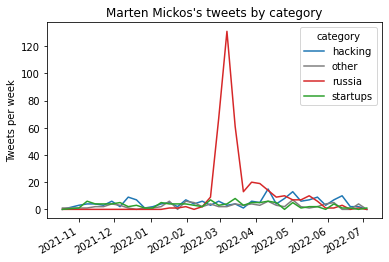

In [12]:
ax = df.groupby([pd.Grouper(key='date', freq='W-MON'), "category"])["date"].count().unstack().fillna(0).plot(color=colors, title="Marten Mickos's tweets by category")
ax.set( ylabel="Tweets per week", xlabel="")

